In [ ]:
#from google.colab import files
#files.upload()

In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train=pd.read_csv('train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])
test=pd.read_csv('test.csv', parse_dates=['pickup_datetime'])
sample_submission=pd.read_csv('sample_submission.csv')

In [3]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test) 
df_sample_submission=pd.DataFrame(sample_submission)

In [4]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [5]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [6]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


시간별로 라벨 생성
--

In [7]:
# df_train 시간별로 라벨 생성
df_train['month_pickup']=df_train['pickup_datetime'].dt.strftime('%m')
df_train['month_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m')

df_train['date_pickup']=df_train['pickup_datetime'].dt.strftime('%d')
df_train['date_dropoff']=df_train['dropoff_datetime'].dt.strftime('%d')

df_train['hour_pickup']=df_train['pickup_datetime'].dt.strftime('%H')
df_train['hour_dropoff']=df_train['dropoff_datetime'].dt.strftime('%H')

df_train['day_pickup']=df_train['pickup_datetime'].dt.strftime('%A')
df_train['day_dropoff']=df_train['dropoff_datetime'].dt.strftime('%A')

df_train.reset_index(drop=True, inplace=True)

In [8]:
# df_test 시간별로 라벨 생성
df_test['month_pickup']=df_test['pickup_datetime'].dt.strftime('%m')

df_test['date_pickup']=df_test['pickup_datetime'].dt.strftime('%d')

df_test['hour_pickup']=df_test['pickup_datetime'].dt.strftime('%H')

df_test['day_pickup']=df_test['pickup_datetime'].dt.strftime('%A')

df_test.reset_index(drop=True, inplace=True)

In [9]:
# 만든 날짜 및 시간별 데이터 정수로 변환
df_train['month_pickup']=pd.Series(df_train['month_pickup'], dtype=int)
df_train['month_dropoff']=pd.Series(df_train['month_dropoff'], dtype=int)

df_train['date_pickup']=pd.Series(df_train['date_pickup'], dtype=int)
df_train['date_dropoff']=pd.Series(df_train['date_dropoff'], dtype=int)

df_train['hour_pickup']=pd.Series(df_train['hour_pickup'], dtype=int)
df_train['hour_dropoff']=pd.Series(df_train['hour_dropoff'], dtype=int)

df_test['month_pickup']=pd.Series(df_test['month_pickup'], dtype=int)
df_test['date_pickup']=pd.Series(df_test['date_pickup'], dtype=int)
df_test['hour_pickup']=pd.Series(df_test['hour_pickup'], dtype=int)

In [10]:
from pandas.api.types import CategoricalDtype

cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

cat_type=CategoricalDtype(categories=cats, ordered=True)

df_train['day_pickup']=df_train['day_pickup'].astype(cat_type)
df_train['day_dropoff']=df_train['day_dropoff'].astype(cat_type)
df_test['day_pickup']=df_test['day_pickup'].astype(cat_type)

1월부터 6월까지 trip_duration 보기
--

In [11]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,14,14,17,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,12,0,0,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,19,11,12,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,6,6,19,19,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,26,26,13,13,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,8,8,13,13,Friday,Friday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,1,10,10,7,7,Sunday,Sunday
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,22,22,6,7,Friday,Friday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,5,5,15,16,Tuesday,Tuesday


[Text(0, 0.5, 'trip_duration'), Text(0.5, 1.0, 'day')]

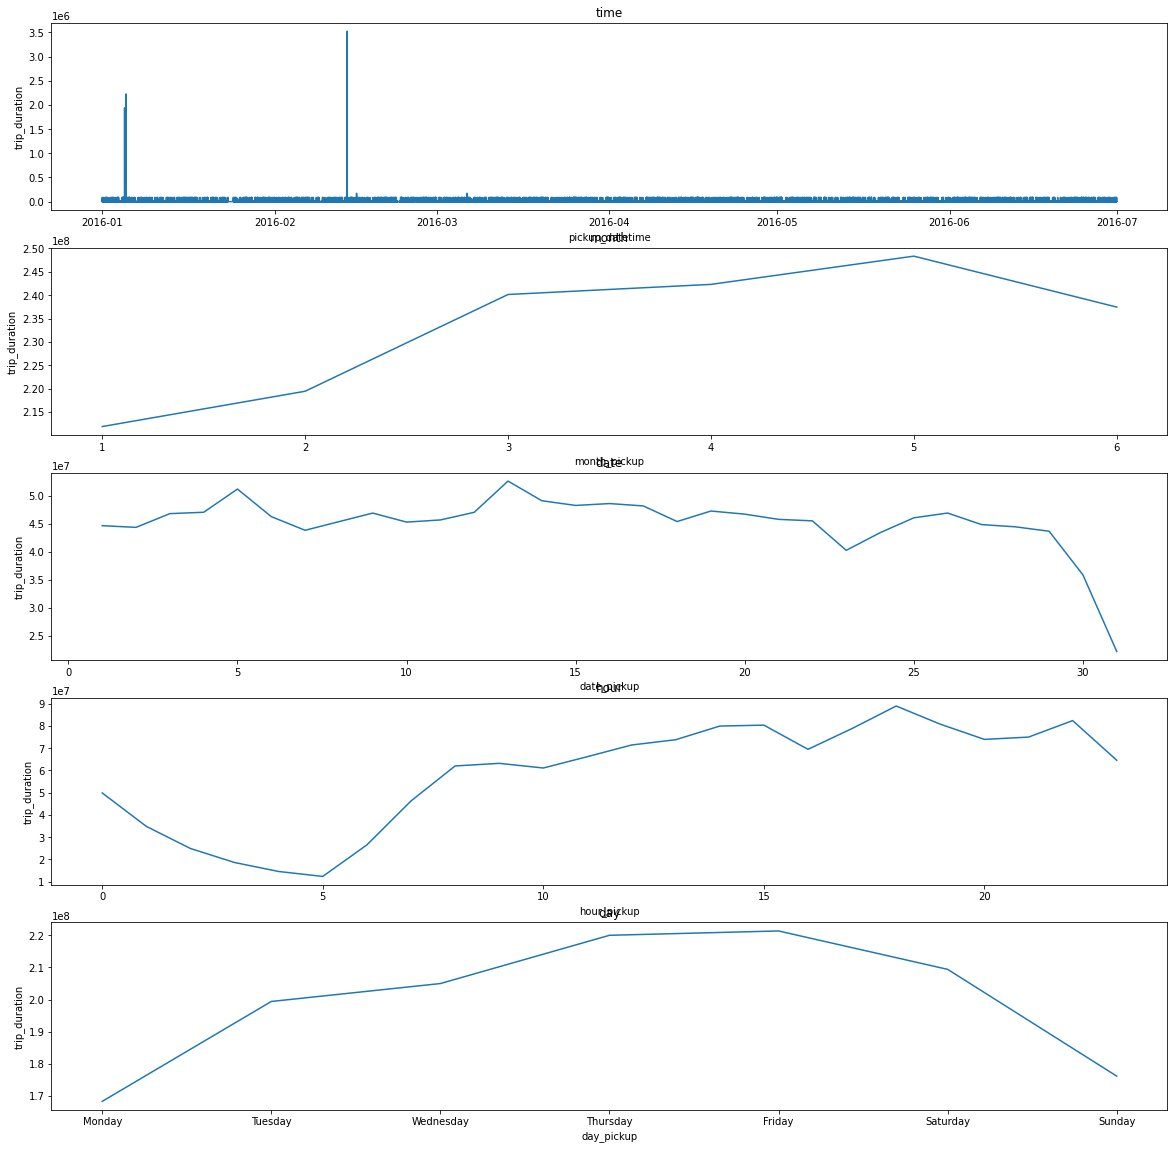

In [12]:
import seaborn as sns
time_tripduration=df_train.groupby('pickup_datetime')['trip_duration'].sum().reset_index()

month_tripduration=df_train.groupby('month_pickup')['trip_duration'].sum().reset_index()

date_tripduration=df_train.groupby('date_pickup')['trip_duration'].sum().reset_index()

hour_tripduration=df_train.groupby('hour_pickup')['trip_duration'].sum().reset_index()

day_tripduration=df_train.groupby('day_pickup')['trip_duration'].sum().reset_index()


figure, ((ax1), (ax2), (ax3), (ax4), (ax5)) =plt.subplots(nrows=5,ncols=1)
figure.set_size_inches(20,20)

sns.lineplot(data=time_tripduration, x="pickup_datetime", y="trip_duration", ax=ax1)
'\n'
sns.lineplot(data=month_tripduration, x="month_pickup", y="trip_duration", ax=ax2)
'\n'
sns.lineplot(data=date_tripduration, x="date_pickup", y="trip_duration", ax=ax3)
'\n'
sns.lineplot(data=hour_tripduration, x="hour_pickup", y="trip_duration", ax=ax4)
'\n'
sns.lineplot(data=day_tripduration, x="day_pickup", y="trip_duration", ax=ax5)

sns.set_style("darkgrid")
ax1.set(ylabel='trip_duration', title ="time")
ax2.set(ylabel='trip_duration', title ="month")
ax3.set(ylabel='trip_duration', title ="date")
ax4.set(ylabel='trip_duration', title ="hour")
ax5.set(ylabel='trip_duration', title ="day")

Label Encoing
--

In [13]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_id=le.fit_transform(df_train['id'])
np_id=df_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

df_train['id']=id_1

In [14]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_test_encoded_id=le.fit_transform(df_test['id'])
np_id=df_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

df_test['id']=id_1

In [15]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_day=le.fit_transform(df_train['day_pickup'])
np_day=df_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

df_train['day_pickup']=day_1

In [16]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_test_encoded_day=le.fit_transform(df_test['day_pickup'])
np_day=df_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

df_test['day_pickup']=day_1

In [17]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_sf=le.fit_transform(df_train['store_and_fwd_flag'])
np_sf=df_train_encoded_sf.reshape(-1,1)
sf_1=map(lambda x: x[0], np_sf)
sf_1=pd.Series(sf_1)

df_train['store_and_fwd_flag']=sf_1

In [18]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_test_encoded_sf=le.fit_transform(df_test['store_and_fwd_flag'])
np_sf=df_test_encoded_sf.reshape(-1,1)
sf_1=map(lambda x: x[0], np_sf)
sf_1=pd.Series(sf_1)

df_test['store_and_fwd_flag']=sf_1

거리, 속도 칼럼 만들어 준뒤에, IQR로 제거
--

In [19]:
i=0
elapsed_time=[]

for i in range(0,1458644):
    e_time=df_train.dropoff_datetime[i]-df_train.pickup_datetime[i]
    elapsed_time.append(e_time)
    i+=1

In [20]:
elapsed_time=pd.Series(elapsed_time)
df_train['elapsed_time']=elapsed_time
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time
0,1049145,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,3,14,14,17,17,1,Monday,0 days 00:07:35
1,867655,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,12,12,0,0,3,Sunday,0 days 00:11:03
2,1406899,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,19,19,11,12,5,Tuesday,0 days 00:35:24
3,1278209,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,4,6,6,19,19,6,Wednesday,0 days 00:07:09
4,796092,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,3,26,26,13,13,2,Saturday,0 days 00:07:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,867169,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,4,8,8,13,13,0,Friday,0 days 00:12:58
1458640,383219,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,1,1,10,10,7,7,3,Sunday,0 days 00:10:55
1458641,841251,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,4,22,22,6,7,0,Friday,0 days 00:12:44
1458642,990387,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,1,5,5,15,16,5,Tuesday,0 days 00:06:13


In [21]:
i=0
elapsed_time_h=[]

for i in range(0,1458644):
    e_time_h=round((df_train.elapsed_time.iloc[i].seconds/3600), 5)
    elapsed_time_h.append(e_time_h)

In [22]:
elapsed_time_h=pd.Series(elapsed_time_h)
df_train['elapsed_time_h']=elapsed_time_h

In [23]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def get_harvevrsion_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon=GeoUtil.degree2radius(x2-x1)
        dLat=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat/2)*math.sin(dLat/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon/2)*math.sin(dLon/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R*b, round_decimal_digits)

In [24]:
df_train['distance']=df_train.id
df_test['distance']=df_test.id

In [25]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [26]:
d=pd.Series(d)
df_train['distance']=d

In [27]:
# 이상치 제거
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [28]:
df_train=remove_outlier_test(df_train, 'elapsed_time_h' )
df_train=remove_outlier_test(df_train, 'distance' )

74324
(1384320, 22)
107658
(1276662, 22)


In [29]:
np_elap=np.array([df_train.elapsed_time_h])
np_dis=np.array([df_train.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
df_train['km_h']=np_speed

In [30]:
df_train=remove_outlier_test(df_train, 'km_h' )

39908
(1236754, 23)


Classification EDA
--

In [31]:
cl_train=df_train.drop(['dropoff_datetime','elapsed_time','day_dropoff','pickup_datetime',
                      'month_dropoff','date_dropoff','hour_dropoff','elapsed_time_h', 'km_h'], axis=1)

cl_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month_pickup,date_pickup,hour_pickup,day_pickup,distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,14,17,1,1.49852
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,12,0,3,1.80551
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,6,19,6,1.48550
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,26,13,2,1.18859
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,1,30,22,2,1.09894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,4,17,18,3,3.53756
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,2,2,0,5,2.31745
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,8,13,0,1.22508
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,5,15,5,1.09256


In [32]:
cl_test=df_test.drop(['pickup_datetime'], axis=1)

cl_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month_pickup,date_pickup,hour_pickup,day_pickup,distance
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,0,6,30,23,4,469364
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,0,6,30,23,4,547621
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,0,6,30,23,4,190107
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,0,6,30,23,4,335483
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,0,6,30,23,4,249509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,0,1,1,0,0,470064
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,0,1,1,0,0,578497
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,0,1,1,0,0,401488
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,0,1,1,0,0,216304


In [33]:
X=cl_train.drop(['trip_duration'], axis=1)
y=cl_train.trip_duration

Standard Scaler 적용하기
--

In [34]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

s_scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
s_X_scaled=s_scaler.transform(X)

clustering
--

In [36]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)

print(kmeans.labels_)

print(kmeans.predict(s_X_scaled))

[7 9 2 ... 0 8 8]
[7 9 2 ... 0 8 8]


pickup 지점 군집화

In [37]:
#pip install mglearn

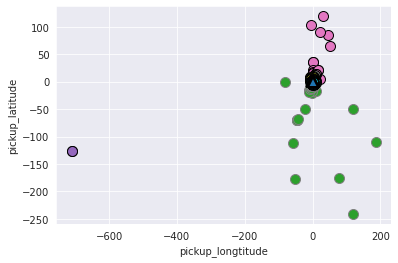

In [38]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

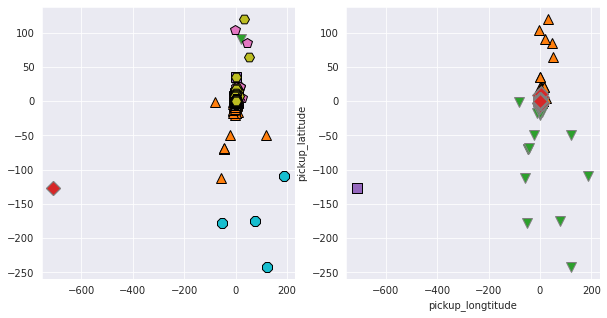

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

dropoff 지점 군집화
--

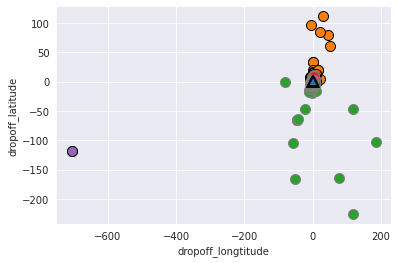

In [40]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

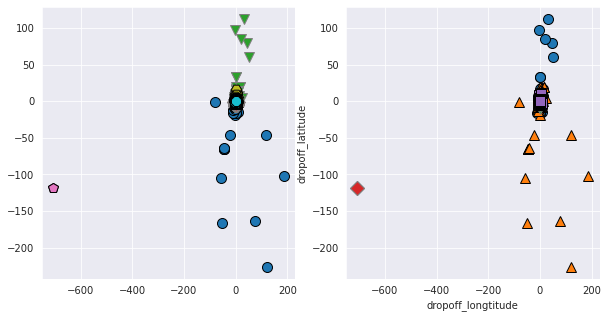

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

StandardScaler clustering train데이터에 대입해주기

In [42]:
i=0
p_lon=[]
p_la=[]
d_lon=[]
d_la=[]


for i in range(0,1236754):
    p_lon.append(s_X_scaled[i][3])
    p_la.append(s_X_scaled[i][4])
    d_lon.append(s_X_scaled[i][5])
    d_la.append(s_X_scaled[i][6])
    i+=1

In [43]:
p_lon=pd.Series(p_lon)
p_la=pd.Series(p_la) 
d_lon=pd.Series(d_lon)
d_la=pd.Series(d_la) 

In [44]:
df_p_lon=pd.DataFrame(p_lon, columns=['p_lon'])
df_p_la=pd.DataFrame(p_la, columns=['p_la'])
df_d_lon=pd.DataFrame(d_lon, columns=['d_lon'])
df_d_la=pd.DataFrame(d_la, columns=['d_la'])

In [45]:
tn=pd.concat([df_p_lon,df_p_la,df_d_lon,df_d_la], axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

s_scaler.fit(cl_test)
s_test_scaled=s_scaler.transform(cl_test)

In [47]:
i=0
p_lon=[]
p_la=[]
d_lon=[]
d_la=[]


for i in range(0,625134):
    p_lon.append(s_test_scaled[i][3])
    p_la.append(s_test_scaled[i][4])
    d_lon.append(s_test_scaled[i][5])
    d_la.append(s_test_scaled[i][6])
    i+=1

In [48]:
p_lon=pd.Series(p_lon)
p_la=pd.Series(p_la)
d_lon=pd.Series(d_lon)
d_la=pd.Series(d_la)

In [49]:
df_p_lon=pd.DataFrame(p_lon, columns=['p_lon'])
df_p_la=pd.DataFrame(p_la, columns=['p_la'])
df_d_lon=pd.DataFrame(d_lon, columns=['d_lon'])
df_d_la=pd.DataFrame(d_la, columns=['d_la'])

In [50]:
te=pd.concat([df_p_lon,df_p_la,df_d_lon,df_d_la], axis=1)

K-means를 이용하여 군집화하기

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(tn[['p_lon','p_la']])
pickup_clusters = kmeans.predict(tn[['p_lon','p_la']])
pickup_clusters

cl_train['pickup_clusters']=pickup_clusters

In [52]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(tn[['d_lon','d_la']])
dropoff_clusters = kmeans.predict(tn[['d_lon','d_la']])
dropoff_clusters

cl_train['dropoff_clusters']=dropoff_clusters

In [53]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(te[['p_lon','p_la']])
pickup_clusters = kmeans.predict(te[['p_lon','p_la']])
pickup_clusters

cl_test['pickup_clusters']=pickup_clusters

In [54]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(te[['d_lon','d_la']])
dropoff_clusters = kmeans.predict(te[['d_lon','d_la']])
dropoff_clusters

cl_test['dropoff_clusters']=dropoff_clusters

군집화 결과 시각화
--

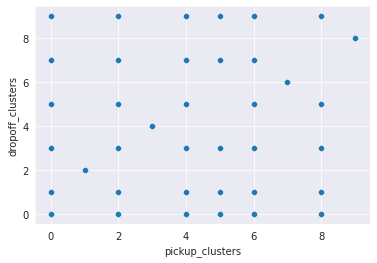

In [55]:
tn_pickup_dropoff=cl_train.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(tn_pickup_dropoff['pickup_clusters'], tn_pickup_dropoff['dropoff_clusters'])

- train

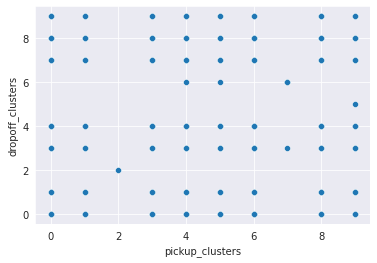

In [56]:
te_pickup_dropoff=cl_test.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(te_pickup_dropoff['pickup_clusters'], te_pickup_dropoff['dropoff_clusters'])

- test

군집 분석 결과 One-Hot Encoding
--

In [57]:
pickup_clusters_tn = pd.get_dummies(cl_train['pickup_clusters'], prefix='pickup_cluster')
dropoff_clusters_tn = pd.get_dummies(cl_train['dropoff_clusters'], prefix='dropoff_cluster')
pickup_clusters_te = pd.get_dummies(cl_test['pickup_clusters'], prefix='pickup_cluster')
dropoff_clusters_te = pd.get_dummies(cl_test['dropoff_clusters'], prefix='dropoff_cluster')

In [58]:
clusters_tn=pickup_clusters_tn.join(dropoff_clusters_tn)
clusters_te=pickup_clusters_te.join(dropoff_clusters_te)

In [59]:
cl_train=cl_train.join(clusters_tn)
cl_test=cl_test.join(clusters_te)

각 승하차 지점별 상관관계

- train

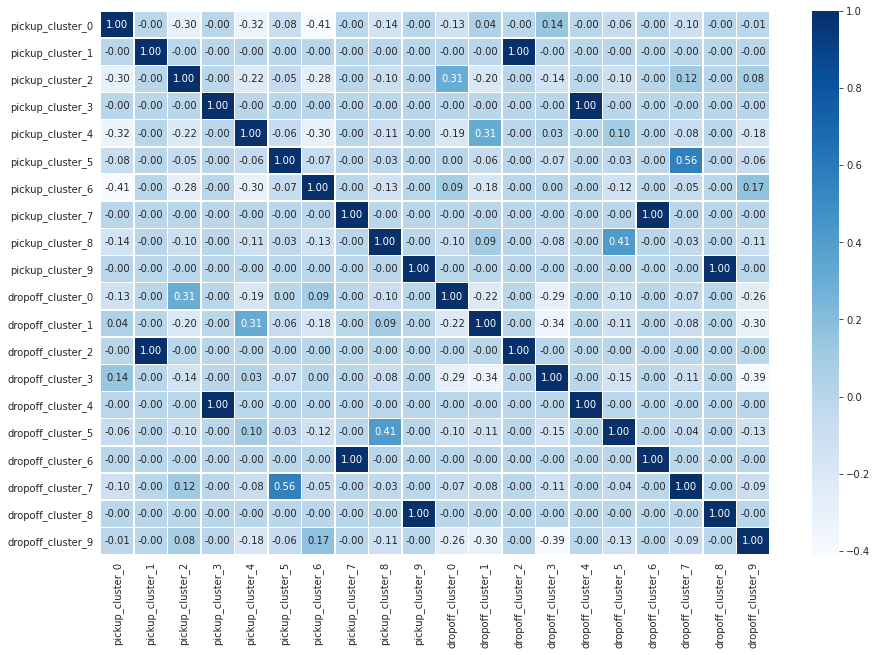

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(data=clusters_tn.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

- test

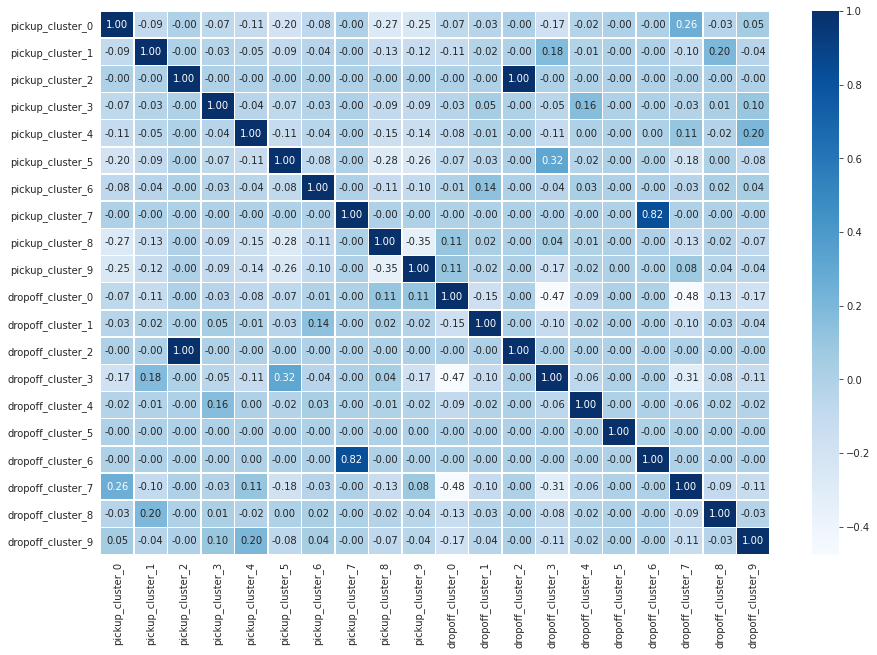

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(data=clusters_te.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [62]:
cl_train_1=cl_train.drop(['pickup_longitude','dropoff_longitude','pickup_latitude',
                'dropoff_latitude',
                'id','month_pickup','date_pickup',
                 'hour_pickup','day_pickup'], axis=1)

In [63]:
cl_test_1=cl_test.drop(['pickup_longitude','dropoff_longitude','pickup_latitude',
                'dropoff_latitude',
                 'id','month_pickup','date_pickup',
                 'hour_pickup','day_pickup'], axis=1)

One-hot Encoding
--

In [64]:
vendor_id_tn = pd.get_dummies(cl_train_1['vendor_id'], prefix='vendor_id')
passenger_count_tn = pd.get_dummies(cl_train_1['passenger_count'], prefix='passenger_count')
store_and_fwd_flag_tn = pd.get_dummies(cl_train_1['store_and_fwd_flag'], prefix='store_and_fwd_flag')

vendor_id_te = pd.get_dummies(cl_test_1['vendor_id'], prefix='vendor_id')
passenger_count_te = pd.get_dummies(cl_test_1['passenger_count'], prefix='passenger_count')
store_and_fwd_flag_te = pd.get_dummies(cl_test_1['store_and_fwd_flag'], prefix='store_and_fwd_flag')

cl_train_1=cl_train_1.join(vendor_id_tn)
cl_train_1=cl_train_1.join(passenger_count_tn)
cl_train_1=cl_train_1.join(store_and_fwd_flag_tn)

cl_test_1=cl_test_1.join(vendor_id_te)
cl_test_1=cl_test_1.join(passenger_count_te)
cl_test_1=cl_test_1.join(store_and_fwd_flag_te)

In [65]:
cl_train_1=cl_train_1.drop(['vendor_id','passenger_count','store_and_fwd_flag'], axis=1)
cl_train_1

,trip_duration,distance,pickup_clusters,dropoff_clusters,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,pickup_cluster_9,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,store_and_fwd_flag_0,store_and_fwd_flag_1
0,455,1.49852,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,663,1.80551,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,429,1.48550,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,435,1.18859,8,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
5,443,1.09894,6,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,760,3.53756,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1458638,414,2.31745,6,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1458639,778,1.22508,6,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1458642,373,1.09256,6,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [66]:
cl_test_1=cl_test_1.drop(['vendor_id','passenger_count','store_and_fwd_flag'], axis=1)

In [67]:
i=0
p7=[]
p8=[]
sf=[]

for i in range(0,625134):
    p7.append(0)
    p8.append(0)
    sf.append(0)
    i+=1

In [68]:
p7=pd.Series(p7)
p8=pd.Series(p8)
sf=pd.Series(sf)

cl_test_1['passenger_count_7']=p7
cl_test_1['passenger_count_8']=p8
cl_test_1['store_and_fwd_flag_0']=sf

cl_test_1=cl_test_1[['distance', 'pickup_cluster_0', 'pickup_cluster_1', 'pickup_cluster_2',
       'pickup_cluster_3', 'pickup_cluster_4', 'pickup_cluster_5',
       'pickup_cluster_6', 'pickup_cluster_7', 'pickup_cluster_8',
       'pickup_cluster_9', 'dropoff_cluster_0', 'dropoff_cluster_1',
       'dropoff_cluster_2', 'dropoff_cluster_3', 'dropoff_cluster_4',
       'dropoff_cluster_5', 'dropoff_cluster_6', 'dropoff_cluster_7',
       'dropoff_cluster_8', 'dropoff_cluster_9', 'vendor_id_1', 'vendor_id_2',
       'passenger_count_0', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'passenger_count_7', 'passenger_count_9',
       'store_and_fwd_flag_0', 'store_and_fwd_flag_1']]
cl_test_1

,distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,pickup_cluster_9,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,store_and_fwd_flag_0,store_and_fwd_flag_1
0,469364,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,547621,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,190107,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,335483,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,249509,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
625130,578497,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
625131,401488,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
625132,216304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [69]:
cl_train_1=cl_train_1.drop(['pickup_clusters', 'dropoff_clusters'], axis=1)

In [70]:
cl_train_1

,trip_duration,distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,pickup_cluster_9,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,store_and_fwd_flag_0,store_and_fwd_flag_1
0,455,1.49852,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,663,1.80551,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,429,1.48550,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,435,1.18859,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
5,443,1.09894,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,760,3.53756,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1458638,414,2.31745,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1458639,778,1.22508,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1458642,373,1.09256,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


Machine learning
--
Regression
--
Linear Regression

Boosting
--

XGboosting vs LightGBM vs CatBoosting

Prophet
--
Fbprophet


Regression: Linear Regression 
--

Linear Regression rmse: 279.413644

In [71]:
lr_train=df_train.drop(['dropoff_datetime','elapsed_time','day_dropoff','pickup_datetime',
                      'month_dropoff','date_dropoff','hour_dropoff'], axis=1)

lr_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month_pickup,date_pickup,hour_pickup,day_pickup,elapsed_time_h,distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,14,17,1,0.12639,1.49852,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,12,0,3,0.18417,1.80551,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,6,19,6,0.11917,1.48550,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,26,13,2,0.12083,1.18859,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,1,30,22,2,0.12306,1.09894,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,4,17,18,3,0.21111,3.53756,16.756951
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,2,2,0,5,0.11500,2.31745,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,8,13,0,0.21611,1.22508,5.668780
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,5,15,5,0.10361,1.09256,10.544928


In [72]:
X=lr_train.drop(['trip_duration','elapsed_time_h','km_h'], axis=1)

In [73]:
y=lr_train.trip_duration

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989403, 13)
(247351, 13)
(989403,)
(247351,)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 279.4164404584157 입니다.
r2 는 0.51 입니다.
train 스코어는 0.5074767221465168 입니다.


In [77]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 279.7211426929788 입니다.
r2 점수는 0.51 입니다.
test 스코어는 0.5061676792199781 입니다.


Boost: XGBoost vs LightGBM vs CatBoost
--

XGboost rmse: 241

LGBM rmse: 220

Cat Boost rmse: 206.075

XGBoost

In [111]:
X=cl_train_1.drop(['trip_duration'], axis=1)
y=cl_train_1.trip_duration

In [78]:
from xgboost import XGBClassifier
import xgboost as xgb
import tqdm
import timeit
from tqdm import tqdm
from tqdm import notebook
from tqdm import tqdm_notebook
from time import sleep
from sklearn import metrics

xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(X_train, y_train))
%time
XGBscore_train = xgb_reg.score(X_train, y_train) # train set 정확도

y_pred=xgb_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('mse는: {:.3f}'.format(mse))
print('rmse는: {:.3f}'.format(rmse))

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

XGBscore_test = xgb_reg.score(X_test, y_test) # 일반화 정확도

print('XGboosting test 점수는 {:.3f}'.format(XGBscore_test))

[14:05:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.3 µs
mse는: 58445.373
rmse는: 241.755
XGboosting train 점수는 0.632
XGboosting test 점수는 0.631


LightGBM

In [79]:
from lightgbm import LGBMClassifier  
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

lgbm_reg.fit(X_train, y_train)
%time
LGBMscore_train = lgbm_reg.score(X_train, y_train) # train set 정확도

y_pred=lgbm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('mse는: {:.3f}'.format(mse))
print('rmse는: {:.3f}'.format(rmse))


print('lightgbm train 점수는 {:.3f}'.format(LGBMscore_train))

LGBMscore_test = lgbm_reg.score(X_test, y_test) # 일반화 정확도

print('lightgbm test 점수는 {:.3f}'.format(LGBMscore_test))


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.68 µs
mse는: 48688.513
rmse는: 220.655
lightgbm train 점수는 0.695
lightgbm test 점수는 0.693


Cat boost

In [83]:
#pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import catboost as cb

cb_reg= cb.CatBoostRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

cb_reg.fit(X_train, y_train)
%time
CBscore_train = cb_reg.score(X_train, y_train) # train set 정확도

y_pred=cb_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('mse는: {:.3f}'.format(mse))
print('rmse는: {:.3f}'.format(rmse))

print('CatBoosting train 점수는 {:.3f}'.format(CBscore_train))

CBscore_test = cb_reg.score(X_test, y_test) # 일반화 정확도

print('lightgbm test 점수는 {:.3f}'.format(CBscore_test))

Prophet: Fbprophet vs Neural prophet
--

fbprophet rmse: 403.7956768440693 

Neural prophet rmse: ?


fb Prophet 적용하기
--

In [84]:
Pt=df_train.drop(['vendor_id', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'month_dropoff','date_dropoff', 'hour_dropoff', 'day_dropoff', 'elapsed_time', 'elapsed_time_h', 'distance', 'km_h'], axis=1)

In [85]:
Pt['ds']=Pt['pickup_datetime']
Pt['y']=Pt['trip_duration']

In [86]:
Pt=Pt.drop(['pickup_datetime', 'trip_duration'], axis=1)

In [87]:
X=Pt.drop(['y'], axis=1)
y=Pt['y']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989403, 6)
(247351, 6)
(989403,)
(247351,)


In [89]:
data=pd.concat([X_train, y_train], axis=1)

In [90]:
data

,id,month_pickup,date_pickup,hour_pickup,day_pickup,ds,y
152310,643382,6,29,12,6,2016-06-29 12:29:33,1077
23986,659174,6,10,9,0,2016-06-10 09:24:09,630
181137,56229,6,3,16,0,2016-06-03 16:12:47,841
217720,300008,5,9,14,1,2016-05-09 14:16:54,309
902289,1380192,4,28,15,4,2016-04-28 15:14:50,841
...,...,...,...,...,...,...,...
130102,285050,2,9,7,5,2016-02-09 07:00:29,893
305842,1029625,3,23,12,6,2016-03-23 12:03:18,808
155696,179939,4,8,16,0,2016-04-08 16:11:20,259
791943,217448,6,8,12,6,2016-06-08 12:10:50,167


In [91]:
fb_train=data.drop(['id','month_pickup','date_pickup','hour_pickup','day_pickup'], axis=1)

fp Prophet 시각화
--

In [92]:
from fbprophet import Prophet

In [95]:
model=Prophet()
model.fit(fb_train)
forecast=model.predict(X_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [96]:
pred=forecast['yhat']

In [97]:
from sklearn.metrics import mean_squared_error

rmse=(np.sqrt(mean_squared_error(y_test, pred)))

print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 403.7956768440693 입니다.


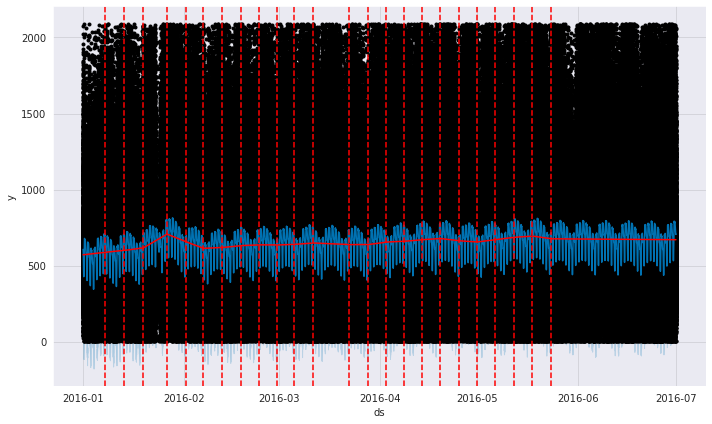

In [98]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)

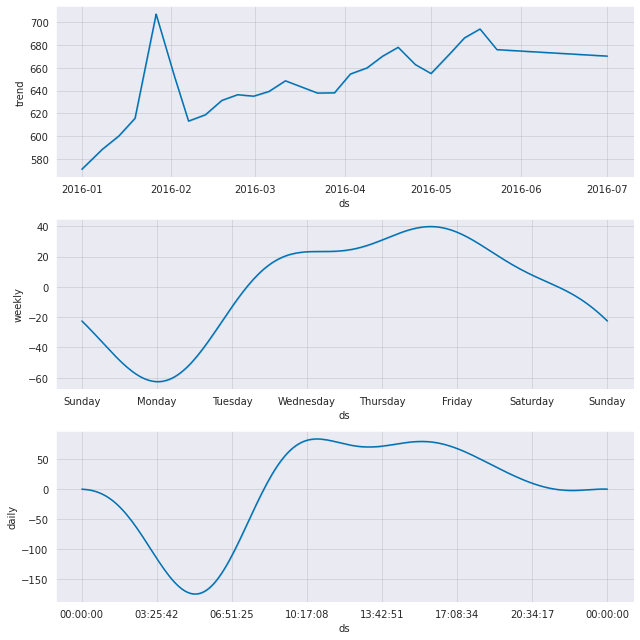

In [99]:
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot_components(forecast)

In [100]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_components_plotly(model, forecast)

Output hidden; open in https://colab.research.google.com to view.

[Text(0, 0.5, 'trip_duration'), Text(0.5, 1.0, 'day')]

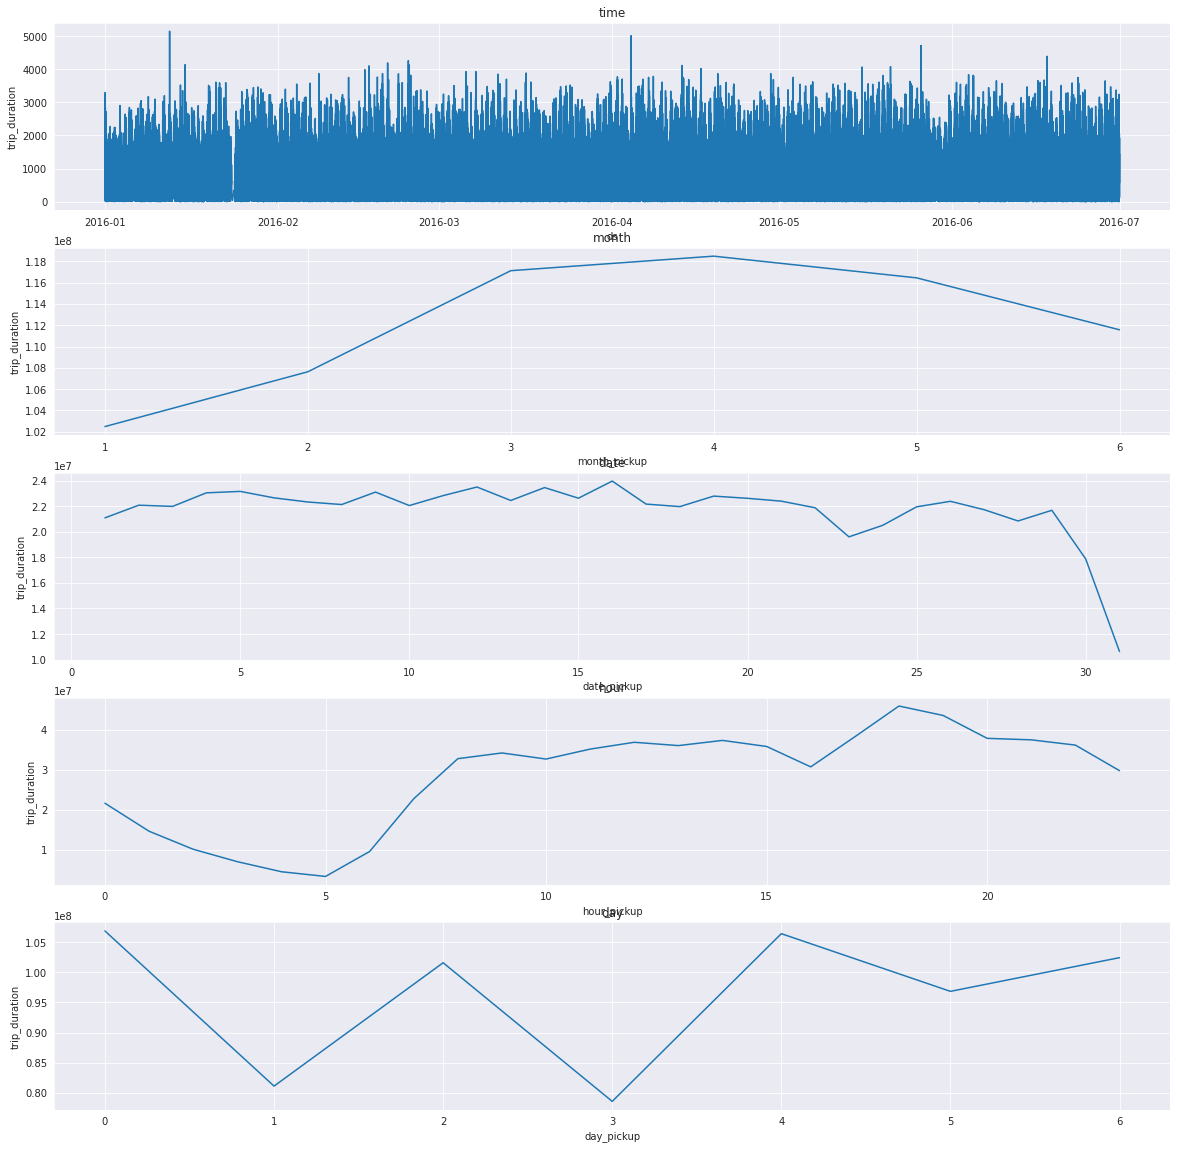

In [101]:
import seaborn as sns
time_tripduration=data.groupby('ds')['y'].sum().reset_index()
month_tripduration=data.groupby('month_pickup')['y'].sum().reset_index()
date_tripduration=data.groupby('date_pickup')['y'].sum().reset_index()
hour_tripduration=data.groupby('hour_pickup')['y'].sum().reset_index()
day_tripduration=data.groupby('day_pickup')['y'].sum().reset_index()

figure, ((ax1), (ax2), (ax3), (ax4), (ax5)) =plt.subplots(nrows=5,ncols=1)
figure.set_size_inches(20,20)

sns.lineplot(data=time_tripduration, x="ds", y="y", ax=ax1)
'\n'
sns.lineplot(data=month_tripduration, x="month_pickup", y="y", ax=ax2)
'\n'
sns.lineplot(data=date_tripduration, x="date_pickup", y="y", ax=ax3)
'\n'
sns.lineplot(data=hour_tripduration, x="hour_pickup", y="y", ax=ax4)
'\n'
sns.lineplot(data=day_tripduration, x="day_pickup", y="y", ax=ax5)

sns.set_style("darkgrid")
ax1.set(ylabel='trip_duration', title ="time")
ax2.set(ylabel='trip_duration', title ="month")
ax3.set(ylabel='trip_duration', title ="date")
ax4.set(ylabel='trip_duration', title ="hour")
ax5.set(ylabel='trip_duration', title ="day")

- 월별 추이(trend)와 시간에 따른 승차시간(daily)의 정보를 제대로 못 잡는 것을 확인할 수 있다.

Cat Boost 하이퍼 파라미터 적용
--

Cat Boost 하이퍼 파라미터 튜닝 적용

In [155]:
X=cl_train_1.drop(['trip_duration'], axis=1)
y=cl_train_1.trip_duration

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989403, 34)
(247351, 34)
(989403,)
(247351,)


Cat boost 하이퍼파라미터 적용

rmse는: 269.190

In [ ]:
from catboost import CatBoostClassifier
import catboost as cb

cb_hyper_reg= cb.CatBoostRegressor(random_state=42, n_estimators=500, 
                                   max_depth=5, learning_rate=0.05) # 기본값: max_depth=3, learning_rate=0.1

cb_hyper_reg.fit(X_train, y_train)
%time
CBscore_train = cb_hyper_reg.score(X_train, y_train) # train set 정확도

y_pred=cb_hyper_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('mse는: {:.3f}'.format(mse))
print('rmse는: {:.3f}'.format(rmse))

print('CatBoosting train 점수는 {:.3f}'.format(CBscore_train))

CBscore_test = cb_hyper_reg.score(X_test, y_test) # 일반화 정확도

print('lightgbm test 점수는 {:.3f}'.format(CBscore_test))

실제 Train, Test 모델에 적용
--

In [171]:
X_train=cl_train_1.drop(['trip_duration'], axis=1)
X_test=cl_test_1
y_train=cl_train['trip_duration']

In [ ]:
from catboost import CatBoostClassifier
import catboost as cb

cb_reg= cb.CatBoostRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

cb_reg.fit(X_train, y_train)
%time
CBscore_train = cb_reg.score(X_train, y_train) # train set 정확도

y_pred=cb_reg.predict(X_test)

In [173]:
submission_ny = df_sample_submission['id']
submission_ny = {"id":df_sample_submission["id"],"trip_duration":y_pred}
submission_ny = pd.DataFrame(submission_ny)
submission_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [174]:
submission_ny.to_csv('submission_ny.csv', index=False)